***Perceptron***


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Use the `make_guassian_quantiles` function from the `sklearn.datasets`class to create 1000 2-dimensional data points with two labels. Put the data in the variable `X` and the classes in the variable `c`. Use `random_state=42`.

In [9]:

X = 0
c = 0
from sklearn.datasets import make_gaussian_quantiles

# YOUR CODE HERE
X, c = make_gaussian_quantiles(n_samples=1000, n_features=2, n_classes=2,random_state=42)
print(c.shape)
X[:,0]



(1000,)


array([ 1.64496771,  1.18947049,  0.06980208,  1.846637  ,  0.36163603,
       -0.69972551, -1.87079192, -0.31526924,  1.07600714, -1.72491783,
        0.47897983,  0.83569211, -0.37220678,  1.18891337,  0.08840689,
       -2.70323229, -0.53025762, -0.18289644,  1.52312408,  0.02079371,
       -0.42930222, -0.71844422,  0.51360011,  1.0325462 ,  1.19663149,
       -0.44643361,  0.25373966,  1.68714164,  1.61371127,  0.79426468,
        0.87006773, -2.02514259, -0.47103831, -1.55662917, -0.00607091,
        0.83033582,  0.59310126,  0.78580016, -1.59442766, -0.70501186,
       -0.90802408,  1.14282281, -1.00654257,  0.93828381, -0.30920908,
       -0.30777823, -0.00360254,  0.44381943,  0.95400176,  0.32271856,
       -0.1906824 , -0.38817682,  0.96337613,  1.10708067,  0.54628425,
       -1.42181067,  0.4134349 ,  0.95313663, -0.73459158, -0.21113024,
        0.53829608,  1.47789404,  1.14927333,  0.5131058 ,  0.05664992,
        0.56091945, -0.52452027, -0.19733842,  0.10537551,  0.63

In [10]:
assert X.shape == (1000,2)
assert c.shape == (1000,)
assert c.max() == 1
assert c.min() == 0

Make a scatterplot of the generated points using two different colors for the different classes.

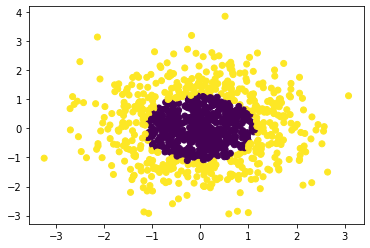

In [11]:

# YOUR CODE HERE
#plt.scatter(X[:,0], c)
plt.scatter(X[:,0],X[:,1],c=c)

#raise NotImplementedError()


Create a function that takes as input `x` and returns the sigmoid of `x` and test it on the given vector `v` (storing the result in the variable `v_activated`.

*N.B.* The sigmoid function should accept any iterable as input, but must return a numpy array.

In [17]:
import numpy as np
from scipy.special import expit
v = [1, 2, -1]

def sigmoid(x):
    return expit(x)

v_activated = sigmoid(v)

# YOUR CODE HERE
#raise NotImplementedError()

In [18]:
assert np.round(v_activated[0], 2) == 0.73
assert np.round(v_activated[1], 2) == 0.88
assert np.round(v_activated[2], 2) == 0.27



Define the step function. As for the sigmoid, create a function that takes as input `x` and returns the sigmoid of `x` and test it on the given vector `v` (storing the result in the variable `v_activated`.

In [75]:
v = [1, 0, -1]

def step(x):
    res = sigmoid(x)
    res = (res > .49).astype(float)
    return res
v_activated = step(v)
# YOUR CODE HERE
#raise NotImplementedError()

In [76]:
v_activated

array([1., 1., 0.])

In [77]:
assert v_activated[0] == 1.0
assert v_activated[1] == 1.0
assert v_activated[2] == 0.0

You want to build a model to choose which book to read based on the following three variables:

- average reviews on Goodreads (from 1 to 5)
- number of 1 stars reviews on Goodreads
- number of reviews on Goodreads
- it's fiction or not

Create a potential dataset with reasonable examples with 5 data points presented in a numpy array of the form `X = np.array([[f11,f12...], [f21, f22,...],...,[f51,f52,...]])` so that the shape of X will be (3,4). In addition, create the `y` vector with binary labels.

In [134]:
X = 0
y = 0



# YOUR CODE HERE
dict_gr = {'avg_reviews':[4.5,3.2,4],'no_1star':[200,450,15503],'no_reviews': [4350,35262,64637],  
           'fiction':[1,0,1]}
df = pd.DataFrame(dict_gr)
X = df.values
y = np.asarray([1,1,0])
print(X)
# YOUR CODE HERE


[[4.5000e+00 2.0000e+02 4.3500e+03 1.0000e+00]
 [3.2000e+00 4.5000e+02 3.5262e+04 0.0000e+00]
 [4.0000e+00 1.5503e+04 6.4637e+04 1.0000e+00]]


In [135]:
assert X.shape == (3,4)
assert np.array([1<=x[0]<=5 for x in X]).sum() == 3
assert np.array([x[3] for x in X]).max() == 1
assert np.array([x[3] for x in X]).min() == 0
assert np.array([x[1]<=x[2] for x in X]).sum() == 3
assert y.max() == 1
assert y.min() == 0
assert y.shape == (3,)



You want to define a boundary n-1 hyperplane for the data you have generated. Create the vector W containing the weights of your model initialized by following a normal distribution (you can use `numpy.random.normal`. Don't forget the bias `b`.

In [136]:
W = 0
b = 0


# YOUR CODE HERE
W = np.random.normal(size=4)
print(W.shape)
b = np.random.normal(size=1)
print(b)


(4,)
[-1.36979996]


In [137]:
assert W.shape == (4,) or W.shape == (4, 1)
assert b.shape == (1,) or b.shape == (1, 1)

Create an array containing the score of your random model on each of the data points you generated. Store the result in the `scores` variable. 

*Hint*: Use the dot product. I recommend you to reshape it at the end so that it has only one dimension, not two.

In [138]:
scores = []


# YOUR CODE HERE
for i in range(X.shape[0]):
    #print(i)
    scores.append(b+ (X[i,:]@W.reshape(4,1)))
print(scores) 
scores = np.asarray(scores)
scores = scores.reshape(3,)
scores

[array([2443.85790966]), array([19593.3793219]), array([39185.14970567])]


array([ 2443.85790966, 19593.3793219 , 39185.14970567])

In [139]:
assert scores.shape == (3,)


Activate all the scores by using the step function you defined before and store them in the `step_scores` variable.

In [140]:
step_scores = 0

step_scores = step(scores)

# YOUR CODE HERE
step_scores


array([1., 1., 1.])

In [141]:
assert step_scores.shape == (3,)

Activate all the scores by using the sigmoid function you defined before and store them in the `sigmoid_scores` variable.

In [142]:
sigmoid_scores = 0

# YOUR CODE HERE
sigmoid_scores = sigmoid(scores)
sigmoid_scores

array([1., 1., 1.])

In [143]:
assert sigmoid_scores.shape == (3,)

Take the `step_scores` as predicted scores. You know that you can update your model weights using the formula:
$$w_{i(new)}=w_{i(old)} + \eta(y-\hat{y})x_{i}$$
where $y$ is the correct label of your data point (your `y[i]`) and $\hat{y}$ is the `step_scores`. And what about $\eta$? It's the learning rate. 

Set the learning rate to 0.1, and create the function `update(W_old, b_old, X, y, step_scores, eta)` that returns the updated weigths vector and bias. Test it using as input (X,y) the first data point of your dataset (*Hint*:`X[0], y[0]`, and of course `step_score[0]`).

In [144]:
def update_weights(W_old, b_old, X, y, step_scores, eta):
    diff = np.array([y - step_scores]).reshape(1,1)
    W_new = W_old + (diff)@X.reshape(1,4)
    b_new = b_old - eta
    return W_new.reshape(4,), b_new.reshape(1,)

eta = 0.1
# YOUR CODE HERE
W_new, b_new = update_weights(W, b, X[0], y[0], step_scores[0], eta)
print(W_new)
print(b_new)


[-0.5904346   0.22271564  0.55290161 -1.78045362]
[-1.46979996]


In [145]:
assert W_new.shape == (4,)
assert b_new.shape == (1,)

Create a for loop to update the weights on each of the points in your dataset. In other words:
Iterate over the data points in X and the labels in y
- compute the `step_score` using the W, b that you have randomly inititated
- use the `update_weights` function to update them
- repeat

Do it for 10 epochs.

In [149]:

epochs = 10
step_score = step(scores)
eta = 0.1
for epoch in range(epochs):
    for x, label in zip(X, y):
        W_new, b_new = update_weights(W, b, x, label, step_scores[label], eta)
        print(W_new, b_new)
        

[-0.5904346   0.22271564  0.55290161 -1.78045362] [-1.46979996]
[-0.5904346   0.22271564  0.55290161 -1.78045362] [-1.46979996]
[-4.59043460e+00 -1.55027773e+04 -6.46364471e+04 -2.78045362e+00] [-1.46979996]
[-0.5904346   0.22271564  0.55290161 -1.78045362] [-1.46979996]
[-0.5904346   0.22271564  0.55290161 -1.78045362] [-1.46979996]
[-4.59043460e+00 -1.55027773e+04 -6.46364471e+04 -2.78045362e+00] [-1.46979996]
[-0.5904346   0.22271564  0.55290161 -1.78045362] [-1.46979996]
[-0.5904346   0.22271564  0.55290161 -1.78045362] [-1.46979996]
[-4.59043460e+00 -1.55027773e+04 -6.46364471e+04 -2.78045362e+00] [-1.46979996]
[-0.5904346   0.22271564  0.55290161 -1.78045362] [-1.46979996]
[-0.5904346   0.22271564  0.55290161 -1.78045362] [-1.46979996]
[-4.59043460e+00 -1.55027773e+04 -6.46364471e+04 -2.78045362e+00] [-1.46979996]
[-0.5904346   0.22271564  0.55290161 -1.78045362] [-1.46979996]
[-0.5904346   0.22271564  0.55290161 -1.78045362] [-1.46979996]
[-4.59043460e+00 -1.55027773e+04 -6.4636

In [ ]:
assert W_new.shape == (4,)
assert b_new.shape == (1,)

Now that you got so far, let's try to train a model for the Iris Dataset.

Maybe you don't like it, but you can't do great things using a perceptron. At the same time, understanding the steps behind it can help you a lot to build your understanding around the neural networks. 

In fact, a neural network is basically the combination of multiple perceptrons on the same input, and a deep neural network is a combination of multiple perceptrons on the combination of multiple perceptrons on ... on the same input! 

I'll help you giving an helper function that, given weights, bias, (x1,x2) coordinates and binary labels, plots the data points and the boundary line:

In [150]:
from IPython import display
import time
# function that plots data and linear classifier
def plot_border(w1, w2, b, data, fig):
    
    plt.axis([0, 10, 0, 6])
    plt.grid()
    
    # scatter data
    for i in range(len(data)) :
        point = data[i]
        color = "r"
        if point[2] == 0 :
            color = "b"
        plt.scatter(point[0], point[1], c=color)

    # separation line
    x = np.linspace(0, 10, 100)
    plt.plot(x, -w1/w2*x+b/w2, '-g', label='y=w1*x+b')
    plt.show()

In [147]:
### load data ###

# each point is a tuple (sepal length, sepal width, flower type)
# types: 0 for Setosa & 1 for Versicolor

data = [[ 5.1,  3.5,  0 ],
       [ 4.9,  3. ,  0 ],
       [ 4.7,  3.2,  0 ],
       [ 4.6,  3.1,  0 ],
       [ 5. ,  3.6,  0 ],
       [ 5.4,  3.9,  0 ],
       [ 4.6,  3.4,  0 ],
       [ 5. ,  3.4,  0 ],
       [ 4.4,  2.9,  0 ],
       [ 4.9,  3.1,  0 ],
       [ 5.4,  3.7,  0 ],
       [ 4.8,  3.4,  0 ],
       [ 4.8,  3. ,  0 ],
       [ 4.3,  3. ,  0 ],
       [ 5.8,  4. ,  0 ],
       [ 5.7,  4.4,  0 ],
       [ 5.4,  3.9,  0 ],
       [ 5.1,  3.5,  0 ],
       [ 5.7,  3.8,  0 ],
       [ 5.1,  3.8,  0 ],
       [ 7. ,  3.2,  1 ],
       [ 6.4,  3.2,  1 ],
       [ 6.9,  3.1,  1 ],
       [ 5.5,  2.3,  1 ],
       [ 6.5,  2.8,  1 ],
       [ 5.7,  2.8,  1 ],
       [ 6.3,  3.3,  1 ],
       [ 4.9,  2.4,  1 ],
       [ 6.6,  2.9,  1 ],
       [ 5.2,  2.7,  1 ],
       [ 5. ,  2. ,  1 ],
       [ 5.9,  3. ,  1 ],
       [ 6. ,  2.2,  1 ],
       [ 6.1,  2.9,  1 ],
       [ 5.6,  2.9,  1 ],
       [ 6.7,  3.1,  1 ],
       [ 5.6,  3. ,  1 ],
       [ 5.8,  2.7,  1 ],
       [ 6.2,  2.2,  1 ],
       [ 5.6,  2.5,  1 ],
       [ 5.9,  3.2,  1 ],
       [ 6.1,  2.8,  1 ],
       [ 6.3,  2.5,  1 ],
       [ 6.1,  2.8,  1 ],
       [ 6.4,  2.9,  1 ]]

data = np.array(data)

Plot the data:

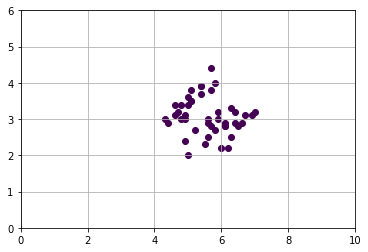

In [152]:

### visualize data ###
plt.axis([0, 10, 0, 6])
plt.grid()
for point in data:
    plt.scatter(point[0],point[1], c=point[2])
   


Set the learning rate `eta` to 1, initialize the weights `w1` and `w2` by using the `np.random.rand()` method, and the bias `b` to 0. Then, run for 100 epochs the perceptron algorithm:
- remember to shuffle the data at each epoch using the `np.random.shuffle(data)` function
- in the for loop there's already a snippet for updating the image everytime:
```
plot_border(w1, w2, b, data_norm, fig)
display.clear_output(wait=True)
time.sleep(0.05)
```
- The weights here are on the form `w1` and `w2`. However, to use your previous code and so the dot product between W and the data, you need to pack `W = np.array([w1, w2])` and then to unpack `w1, w2 = W` before plotting at each epoch!


In [19]:
eta = 1
epochs = 100
w1 = np.random.rand()
w2 = np.random.rand()
b = 0
fig = plt.figure()

for epoch in range(epochs):
    # shuffle data
    np.random.shuffle(data)
    for x1, x2, y in data:
        # remember to pack w1,w2 into a numpy array W
        # remember to pack x1,x2 into a numpy array W
        
        
    plot_border(w1, w2, b, data, fig)
    display.clear_output(wait=True)

    
    
# YOUR CODE HERE

    plot_border(w1, w2, b, data, fig)


IndentationError: expected an indented block (<ipython-input-19-0c5f8efa0ac6>, line 16)

In [ ]:
assert W.shape == (2,)
assert W[0] == w1
assert W[1] == w2

Implement a function `guess_flower(sepal_length, sepal_width, W, b)` that prints Iris-setosa in case of negative score and return 0, Iris-versicolor in case of positive score and return 1.

In [ ]:
# prediction function: 0 for Iris-setosa and 1 for Iris-versicolor

def guess_flower(sepal_length, sepal_width, W, b):
    if 0:
        print('Iris-setosa')
    else:
        print('Iris-versicolor')
        
# YOUR CODE HERE
raise NotImplementedError()



In [ ]:
assert guess_flower(5.4, 3.4, W, b) == 0 or guess_flower(5.4, 3.4, W, b) == 1

In [ ]:
test_data = [[ 5.4,  3.4,  0. ],
           [ 4.6,  3.6,  0. ],
           [ 5.1,  3.3,  0. ],
           [ 4.8,  3.4,  0. ],
           [ 5. ,  3. ,  0. ],
           [ 5. ,  3.4,  0. ],
           [ 5.2,  3.5,  0. ],
           [ 5.2,  3.4,  0. ],
           [ 4.7,  3.2,  0. ],
           [ 4.8,  3.1,  0. ],
           [ 5.4,  3.4,  0. ],
           [ 5.2,  4.1,  0. ],
           [ 5.5,  4.2,  0. ],
           [ 4.9,  3.1,  0. ],
           [ 5. ,  3.2,  0. ],
           [ 5.5,  3.5,  0. ],
           [ 4.9,  3.1,  0. ],
           [ 4.4,  3. ,  0. ],
           [ 5.1,  3.4,  0. ],
           [ 5. ,  3.5,  0. ],
           [ 4.5,  2.3,  0. ],
           [ 4.4,  3.2,  0. ],
           [ 5. ,  3.5,  0. ],
           [ 5.1,  3.8,  0. ],
           [ 4.8,  3. ,  0. ],
           [ 5.1,  3.8,  0. ],
           [ 4.6,  3.2,  0. ],
           [ 5.3,  3.7,  0. ],
           [ 5. ,  3.3,  0. ],
           [ 6.8,  2.8,  1. ],
           [ 6.7,  3. ,  1. ],
           [ 6. ,  2.9,  1. ],
           [ 5.7,  2.6,  1. ],
           [ 5.5,  2.4,  1. ],
           [ 5.5,  2.4,  1. ],
           [ 5.8,  2.7,  1. ],
           [ 6. ,  2.7,  1. ],
           [ 5.4,  3. ,  1. ],
           [ 6. ,  3.4,  1. ],
           [ 6.7,  3.1,  1. ],
           [ 6.3,  2.3,  1. ],
           [ 5.6,  3. ,  1. ],
           [ 5.5,  2.5,  1. ],
           [ 5.5,  2.6,  1. ],
           [ 6.1,  3. ,  1. ],
           [ 5.8,  2.6,  1. ],
           [ 5. ,  2.3,  1. ],
           [ 5.6,  2.7,  1. ],
           [ 5.7,  3. ,  1. ],
           [ 5.7,  2.9,  1. ],
           [ 6.2,  2.9,  1. ],
           [ 5.1,  2.5,  1. ],
           [ 5.7,  2.8,  1. ]]

Test your model on the test set. You should be able to achieve at least 95% accuracy. Provide your model in `W` and `b` and your function `guess_flower(x1, x2, W, b)` should accept the parameters in that order.

In [ ]:
# If you called W and b in a different way, here you can rename it.
# Otherwise, check the accuracy you achieved

# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
assert correct/total >= 0.95

## Challenge

Can you make a cool animation of the running algorithm and post it on the social? 😉

If you create it directly using Python, it's a plus!